# 🧠 Exploratory Data Analysis (EDA)

In this notebook, we explore the Tiny ImageNet dataset to better understand its structure, contents, and characteristics. This helps guide preprocessing, augmentation, and model training decisions.


## 🔍 1. Dataset Overview

Tiny ImageNet is a smaller version of the original ImageNet dataset. It consists of:

- **200 classes**
- **500 training images per class**
- **50 validation images per class**
- **64×64 resolution** for each image

The data is structured as follows:
tiny-imagenet-200/ ├── train/ │ ├── n01443537/ │ │ └── images/ │ └── ... ├── val/ ├── test/ ├── wnids.txt └── words.txt

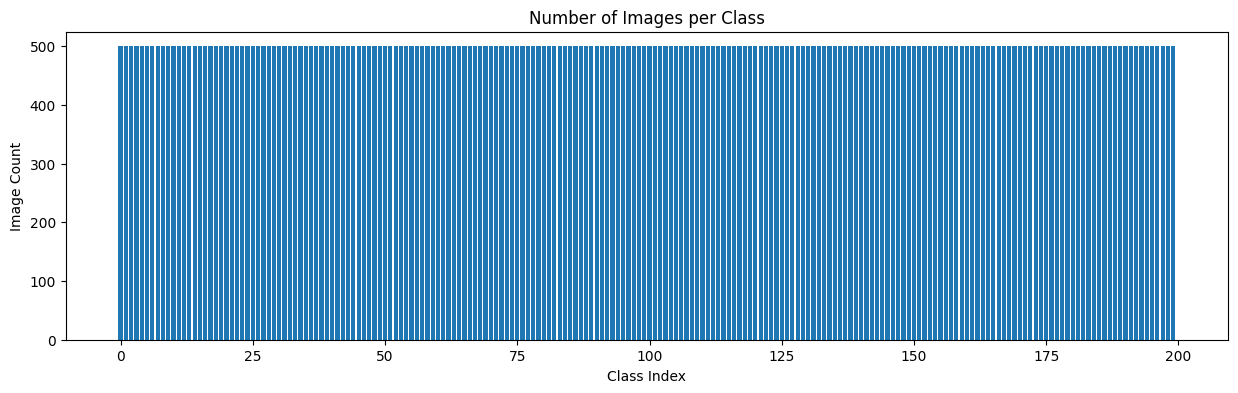

In [8]:
import os
import matplotlib.pyplot as plt

base_path = '/home/karim/Documents/3Y/ML/project/data/tiny-imagenet-200/train'
class_counts = {
    cls: len(os.listdir(os.path.join(base_path, cls, 'images')))
    for cls in os.listdir(base_path)
}

# Plot
plt.figure(figsize=(15, 4))
plt.bar(range(len(class_counts)), list(class_counts.values()))
plt.title("Number of Images per Class")
plt.xlabel("Class Index")
plt.ylabel("Image Count")
plt.show()


## 🖼 3. Sample Images

Let’s visualize a sample image from one of the classes to get a feel for the dataset.


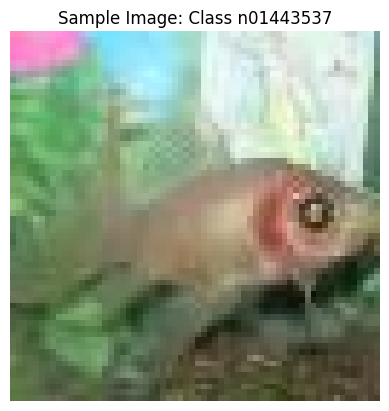

In [9]:
img_path = '/home/karim/Documents/3Y/ML/project/data/tiny-imagenet-200/train/n01443537/images/n01443537_0.JPEG'
img = plt.imread(img_path)
plt.imshow(img)
plt.title('Sample Image: Class n01443537')
plt.axis('off')
plt.show()


## 📈 4. Compute Mean and Standard Deviation

Before feeding the images into a neural network, it's common practice to normalize the pixel values. We calculate the **channel-wise mean and standard deviation** across the dataset:


In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(
    root=base_path,
    transform=transform
)

loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=2)

mean = 0.
std = 0.
total_images = 0

for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images += batch_samples

mean /= total_images
std /= total_images

print(f"Mean: {mean}")
print(f"Std (Standard Deviation): {std}")


Mean: tensor([0.4802, 0.4481, 0.3975])
Std: tensor([0.2296, 0.2263, 0.2255])


## 📊 5. Mean and Standard Deviation

The mean and standard deviation for each color channel (Red, Green, and Blue) are calculated across all images in the training dataset. These values are important for normalizing the images before feeding them into the model. The purpose of normalization is to help the model learn more effectively by scaling the data to a similar range.

### **Mean and Standard Deviation Results:**
- **Red channel (Mean: 0.4802, Std: 0.2296)**
- **Green channel (Mean: 0.4481, Std: 0.2263)**
- **Blue channel (Mean: 0.3975, Std: 0.2255)**

These values indicate the following:
- The **mean** value represents the average pixel intensity for each channel. The values are in the range `[0, 1]` because we used `transforms.ToTensor()` to normalize the pixel values to this range.
- The **standard deviation** indicates the spread or variability in pixel intensity for each channel. A lower standard deviation means the pixel intensities are more consistent across images, while a higher standard deviation means there is more variation in pixel values.

### **Why are these important?**
The mean and standard deviation values are used to normalize the image data, ensuring that the model can learn more effectively. During training, we will subtract the mean and divide by the standard deviation for each color channel to ensure the data is centered around zero with a consistent scale:
```python
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4802, 0.4481, 0.3975], std=[0.2296, 0.2263, 0.2255])
])


## ✅ Summary

- Dataset is balanced with 500 images per class.
- All images are 64x64 and RGB.
- Visual inspection confirms data quality.
- Mean and standard deviation have been computed for normalization.
